In [1]:
import numpy as np

# Function to parse the .par file
def parse_par_file(par_file):
    params = {}
    with open(par_file, 'r') as file:
        for line in file:
            line = line.strip()
            if line and not line.startswith('#') and '=' in line:
                key, value = line.split('=', 1)
                params[key.strip()] = value.split('#')[0].strip()  # Remove comments
    return params

# Function to generate a synthetic spectrum
def generate_spectrum(wavelength_range, planet_radius, temperature, h2o_abundance):
    wavelengths = np.linspace(wavelength_range[0], wavelength_range[1], 100)
    # Simple model: transit depth scaling with H2O absorption and temperature
    transit_depth = (planet_radius**2) + h2o_abundance * np.exp(-wavelengths / temperature)
    errors = np.full_like(wavelengths, 0.0001)  # Mock error
    return wavelengths, transit_depth, errors

# Function to save the spectrum to a .dat file
def save_to_dat(wavelengths, transit_depth, errors, output_file):
    with open(output_file, 'w') as file:
        for w, t, e in zip(wavelengths, transit_depth, errors):
            file.write(f"{w:.6e} {t:.6e} {e:.6e}\n")

# Main function to convert .par file to .dat file
def par_to_dat(par_file, output_file):
    params = parse_par_file(par_file)

    # Extract necessary parameters with defaults
    planet_radius = float(params.get('planet_radius', 1.0))  # Default to 1 Jupiter radius
    temperature = float(params.get('T', 1200))  # Default to 1200 K
    h2o_abundance = float(params.get('mix_ratio', 1e-4))  # Default H2O abundance
    wavelength_range = [0.5, 2.5]  # Default range in microns

    # Generate synthetic spectrum
    wavelengths, transit_depth, errors = generate_spectrum(wavelength_range, planet_radius, temperature, h2o_abundance)

    # Save spectrum to .dat file
    save_to_dat(wavelengths, transit_depth, errors, output_file)
    print(f"Spectrum saved to {output_file}")

# Example usage
par_file = "quickstart.par"
output_file = "quickstart.dat"
par_to_dat(par_file, output_file)

Spectrum saved to quickstart.dat


In [2]:
import h5py
import numpy as np

file_path = '/ca24/AstroCode-Collective/src/daneel/detection/Simple_Transmission_retrieval.h5'

# Open the file and inspect its structure
with h5py.File(file_path, 'r') as f:
    print("Datasets and groups in the file:")
    def print_structure(name, obj):
        print(name)
    f.visititems(print_structure)


Datasets and groups in the file:
Bibliography
Bibliography/bibtex
Bibliography/short_form
ModelParameters
ModelParameters/Chemistry
ModelParameters/Chemistry/CH4
ModelParameters/Chemistry/CH4/gas_type
ModelParameters/Chemistry/CH4/mix_ratio
ModelParameters/Chemistry/CH4/molecule_name
ModelParameters/Chemistry/CO
ModelParameters/Chemistry/CO/gas_type
ModelParameters/Chemistry/CO/mix_ratio
ModelParameters/Chemistry/CO/molecule_name
ModelParameters/Chemistry/CO2
ModelParameters/Chemistry/CO2/gas_type
ModelParameters/Chemistry/CO2/mix_ratio
ModelParameters/Chemistry/CO2/molecule_name
ModelParameters/Chemistry/H2O
ModelParameters/Chemistry/H2O/gas_type
ModelParameters/Chemistry/H2O/mix_ratio
ModelParameters/Chemistry/H2O/molecule_name
ModelParameters/Chemistry/active_gases
ModelParameters/Chemistry/chemistry_type
ModelParameters/Chemistry/fill_gases
ModelParameters/Chemistry/inactive_gases
ModelParameters/Chemistry/ratio
ModelParameters/Contributions
ModelParameters/Contributions/Absorption

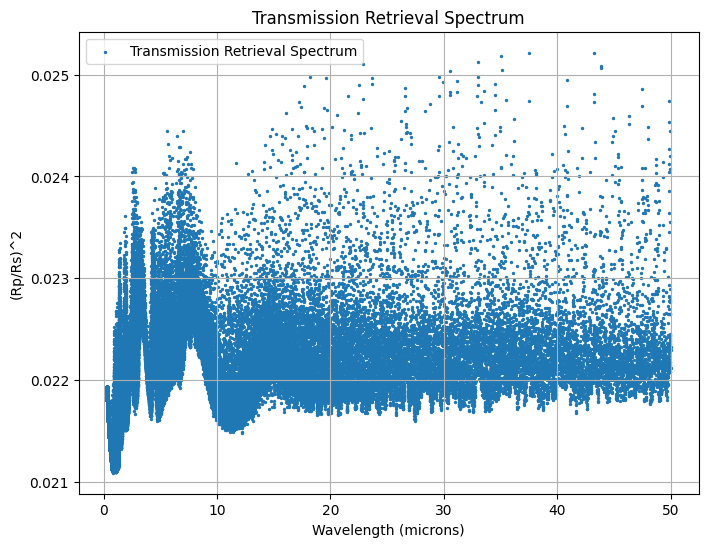

In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Path to the HDF5 file
file_path = '/ca24/AstroCode-Collective/src/daneel/detection/Simple_Transmission_retrieval.h5'

# Open the HDF5 file and extract data
with h5py.File(file_path, 'r') as f:
    # Extract wavelength and spectrum
    wavelength = f['Output/Spectra/native_wlgrid'][:]  # Wavelength grid
    spectrum = f['Output/Spectra/native_spectrum'][:]  # Native spectrum

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(wavelength, spectrum, s=2, label='Transmission Retrieval Spectrum')
plt.xlabel('Wavelength (microns)')
plt.ylabel('(Rp/Rs)^2')
plt.title('Transmission Retrieval Spectrum')
plt.legend()
plt.grid(True)
plt.savefig('/ca24/AstroCode-Collective/HD_209458_b_assignment3_taskC_spectrum.png')  # Save the plot
plt.show()


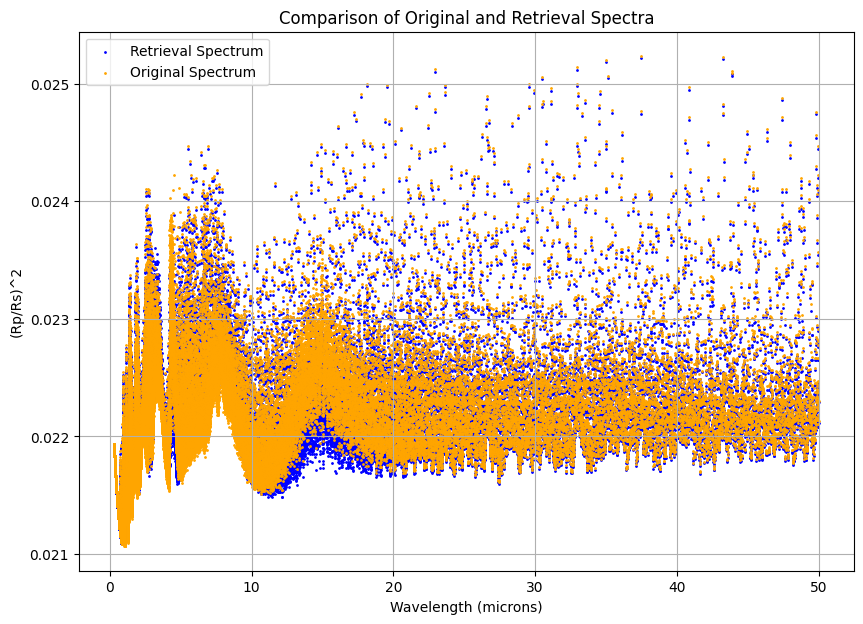

Plot saved to /ca24/AstroCode-Collective/assignment3_taskC.png


In [13]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Paths to the HDF5 file and original data
retrieval_file_path = '/ca24/AstroCode-Collective/src/daneel/detection/Simple_Transmission_retrieval.h5'
original_data_file_path = '/ca24/AstroCode-Collective/src/daneel/detection/Simple_Transmission.h5'

# Load the retrieval spectrum
with h5py.File(retrieval_file_path, 'r') as f:
    wavelength_retrieval = f['Output/Spectra/native_wlgrid'][:]  # Wavelength grid
    spectrum_retrieval = f['Output/Spectra/native_spectrum'][:]  # Native spectrum
    # Mock error bars for retrieval (replace with actual errors if available)
#    errors_retrieval = np.full_like(wavelength_retrieval, 0.0001)

with h5py.File(original_data_file_path, 'r') as f:
    wavelength_original = f['Output/Spectra/native_wlgrid'][:]  # Replace with actual dataset name
    spectrum_original = f['Output/Spectra/native_spectrum'][:]
#    errors_original = f['Errors'][:]  # If errors are stored

# Plot the data
plt.figure(figsize=(10, 7))

# Plot the retrieval spectrum with error bars
plt.scatter(wavelength_retrieval, spectrum_retrieval,
             label='Retrieval Spectrum', color='blue', s=1)
#plt.errorbar(wavelength_retrieval, spectrum_retrieval, yerr=errors_retrieval, fmt='o', markersize=2, capsize=3,
#             label='Retrieval Spectrum', color='blue', ecolor='blue', alpha=0.7)

# Plot the original spectrum with error bars
plt.scatter(wavelength_original, spectrum_original,
             label='Original Spectrum', color='orange', s=1)
#plt.errorbar(wavelength_original, spectrum_original, yerr=errors_original, fmt='o', markersize=2, capsize=3,
#             label='Original Spectrum', color='orange', ecolor='orange', alpha=0.7)

# Customize plot
plt.xlabel('Wavelength (microns)')
plt.ylabel('(Rp/Rs)^2')
plt.title('Comparison of Original and Retrieval Spectra')
plt.legend()
plt.grid(True)

# Save the plot
output_path = '/ca24/AstroCode-Collective/assignment3_taskC.png'
plt.savefig(output_path)
plt.show()
print(f"Plot saved to {output_path}")